# Carbon Emissions Around the World with a focus on the United States

#### Create your virtual environment, ensure you're in the correct directory, and install the requirements.txt.

In [1]:
# Import modules needed to run project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


## Read in the Data

In [2]:
df = pd.read_csv('assets/co2_emissions_kt_by_country.csv')

# Use .info() to get a general idea of what you're working with.
df.info()
# Use .head() to see what data types are present and to get your column headers.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


## Clean the Data

- ##### The "value" column currently rounds to the thousandths place and it isn't entirely necessary for such a simple demonstration and won't significantly distort the data once it's visualized later so let's round the values to the hundredths instead.

In [3]:
df['value'] = df['value'].round(decimals=2)
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.68
1,ABW,Aruba,1961,11576.72
2,ABW,Aruba,1962,12713.49
3,ABW,Aruba,1963,12178.11
4,ABW,Aruba,1964,11840.74


- #### Rename columns for clarity. The reader won't know what the emissions were measured in based on the value column so let's be make it more accurate. Furthermore, I can format the other columns to achieve a cleaner, more professional look.

In [4]:
# Rename column/columns using ".rename() method". Must format as dict {x:x}. Use "inplace= True" to save in current variable (df). Could also just create new variable (df2) and not include "inplace= True"
df.rename(columns= {'value': 'Carbon Emissions (in kilotons)', 'country_name': 'Country', 'year': 'Year', 'country_code': 'Country Code'}, inplace= True)

## Analyze the data

- #### What quick insights can be gathered from this data?
    - ##### How about I try to determine which 5 countries are emitting the most carbon as of 2019?

In [5]:
filtered_df = df[df['Year'].between(2019, 2019)].sort_values(by='Year')
sorted_df = filtered_df.sort_values(by='Carbon Emissions (in kilotons)', ascending=False)
sorted_df.head()

,Country Code,Country,Year,Carbon Emissions (in kilotons)
13651,WLD,World,2019,34344006.07
5569,IBT,IDA & IBRD total,2019,22442415.57
7578,LMY,Low & middle income,2019,21909426.50
8254,MIC,Middle income,2019,21712598.06
5509,IBD,IBRD only,2019,21522419.75


- ##### Well that's odd, isn't it? I don't see a country in that list, do you? It appears that our dataframe has additional data point outside of simply countries. What can I do about that? Can I filter the dataframe so that only countries are shown? Let's find out!

- #####  I'm going to need something that can allow me to sort these columns by country. A simple google search has pointed me to a nice github that has a compiled csv file of official country codes. Fortunately, my data has a column which utilizes alpha-3 country codes. AHA! I've found the variable by which I can filter my data. (A link to the raw url of the data can be found in the README. Additionally, I've copied that data to a csv in the event that something happens to the URL. That can also  be found in the README under "backup_country_codes.csv" )

In [6]:

# Read in country codes from a helpful github user. Thanks!
country = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

# *** If for whatever reason, the url does not read in, then "markdown" the code above and "unmarkdown" the code listed directly below this statement:
# country = pd.read_csv('assets/backup_country_codes.csv')

# Let's check the headers
country.head()


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [7]:
# We only need the alpha-3 column so let's assign that to its own variable.
country_codes= country['alpha-3']
# Use the above variable to filter our original dataframe so that only countries are displayed
code_filtered_df = df[df['Country Code'].isin(country_codes)]
# Check our work
code_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11094 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    11094 non-null  object 
 1   Country                         11094 non-null  object 
 2   Year                            11094 non-null  int64  
 3   Carbon Emissions (in kilotons)  11094 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 433.4+ KB


- ##### Let's check our top 5 again. Our top 5 carbon-emitting countries happen to be China, USA, India, Russian Federation, and Japan.

In [8]:
code_filtered_df = code_filtered_df[code_filtered_df['Year'].between(2019, 2019)].sort_values(by='Year')
new_df = code_filtered_df.sort_values(by='Carbon Emissions (in kilotons)', ascending=False)
new_df.head()

,Country Code,Country,Year,Carbon Emissions (in kilotons)
2159,CHN,China,2019,10707219.73
13268,USA,United States,2019,4817720.21
5869,IND,India,2019,2456300.05
10753,RUS,Russian Federation,2019,1703589.97
6409,JPN,Japan,2019,1081569.95


- ##### Manipulate data for easier visualization later. Now that I've determined our top 5 carbon-emitting countries, I've gone ahead and created individual dataframes for them. As you'll see later in the analysis, creating these unique dataframes will allow me to make graphs a bit more easily.

In [9]:
# Create df focused solely on USA data. If you read the line of code, then you'll see that we're creating a dataframe using data that is only associated with entries that contain "United States."
usa = df[df['Country'].str.contains('United States')]
# Use .info() to determine how much data will be accounted for in the USA-focused dataframe.
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 13209 to 13268
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    60 non-null     object 
 1   Country                         60 non-null     object 
 2   Year                            60 non-null     int64  
 3   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


- ##### Now that I've shown you how to create country-specific data frames, let's go ahead and create the other four dataframes that we'll be comparing the USA to.

In [10]:
# Create df for other prominent countries for future comparisons
chn = df[df['Country'].str.contains('China')]
ind = df[df['Country'].str.contains('India')]
jpn = df[df['Country'].str.contains('Japan')]
rus = df[df['Country'].str.contains('Russian Federation')]

In [11]:
# Check to see if dataframes created for the other five countries all have the same amount of rows and columns as our original USA dataframe.
chn.info()
ind.info()
jpn.info()
rus.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 2100 to 7845
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    174 non-null    object 
 1   Country                         174 non-null    object 
 2   Year                            174 non-null    int64  
 3   Carbon Emissions (in kilotons)  174 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 5810 to 5869
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    60 non-null     object 
 1   Country                         60 non-null     object 
 2   Year                            60 non-null     int64  
 3   Carbon Emissions (in kilotons)  60 non-null    

- ##### China seems to be the only divergent dataframe in terms of data output. Let's investigate to see what happened.

In [12]:
chn

,Country Code,Country,Year,Carbon Emissions (in kilotons)
2100,CHN,China,1960,780726.30
2101,CHN,China,1961,552066.85
2102,CHN,China,1962,440359.03
2103,CHN,China,1963,436695.70
2104,CHN,China,1964,436923.05
...,...,...,...,...
7841,MAC,"Macao SAR, China",2012,1345.79
7842,MAC,"Macao SAR, China",2013,1272.45
7843,MAC,"Macao SAR, China",2014,1576.81
7844,MAC,"Macao SAR, China",2015,2090.19


- ##### It seems as though "China" is included in the country name for multiple points in the original dataframe. I can make a slight modification to the original parameters of the code to ensure that it's stricter in its text selection. I simply change ".contains" to ".match" and it will focus only columns that strictly match "China". By using the code below the chn dataframe is now in line with the other country-specific dataframes created above.


In [13]:
chn = df[df['Country'].str.match('China')]
chn.info()
chn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2100 to 2159
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    60 non-null     object 
 1   Country                         60 non-null     object 
 2   Year                            60 non-null     int64  
 3   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


,Country Code,Country,Year,Carbon Emissions (in kilotons)
2100,CHN,China,1960,780726.30
2101,CHN,China,1961,552066.85
2102,CHN,China,1962,440359.03
2103,CHN,China,1963,436695.70
2104,CHN,China,1964,436923.05
2105,CHN,China,1965,475972.93
2106,CHN,China,1966,522789.52
2107,CHN,China,1967,433234.05
2108,CHN,China,1968,468928.63
2109,CHN,China,1969,577237.14


## Visualize the data

##### Plotting the US Two ways

In [14]:
# .plot plotting implementation to visualize a line graph.
# usa.plot.line(x ='Year', rot= 45, y= 'Carbon Emissions (in kilotons)', title = 'United States Carbon Emissions', figsize= (10, 5), grid= True)

- ##### Let's get a general idea of what the USA looks like on a graph. As you can see it's been a rollercoaster of a journey. In general it seems as though we're progressively getting worse overall, though the last decade seems to be making some improvements. 

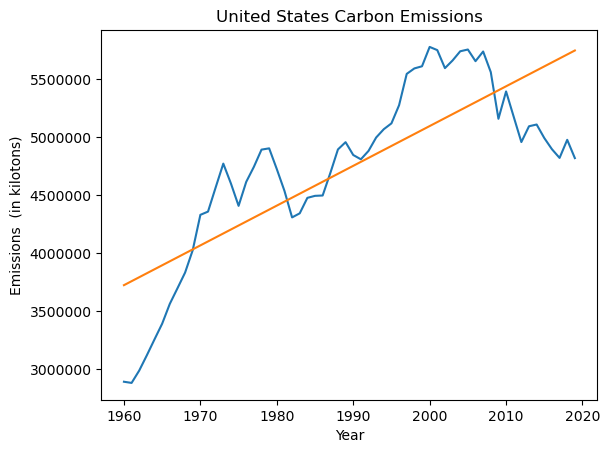

In [15]:
# plt.show implementation to generate same graph differently.
fig, ax = plt.subplots()
ax.plot(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("United States Carbon Emissions")
ax.ticklabel_format(style='plain')
# calculate and plot the trendline using the three lines of code below.
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
ax.plot(usa['Year'], p(usa['Year']))
plt.show()


##### - Considering this is the visualization section, let's see how we're trending mathematically. ENTER THE TRENDLINE!



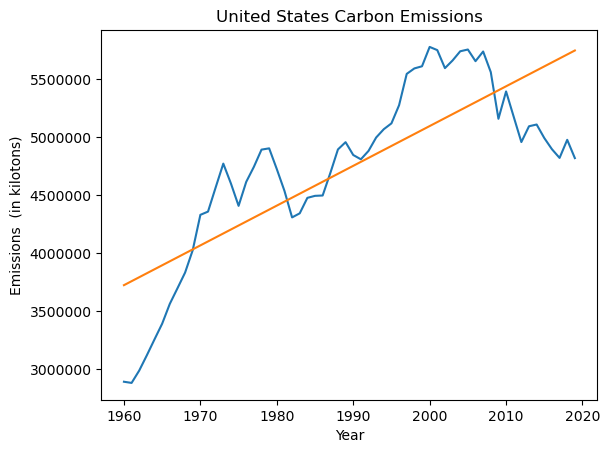

In [16]:
# plt.show implementation to generate same graph differently.
fig, ax = plt.subplots()
ax.plot(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("United States Carbon Emissions")
ax.ticklabel_format(style='plain')
# calculate and plot the trendline using the three lines of code below.
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
ax.plot(usa['Year'], p(usa['Year']))
plt.show()

##### - As you can see, the USA has an upward trend from the inception of this record-keeping to 2019. However, we're currently trending downward and have been doing so since the late 2000s. We can actually narrow our focus to, let's say, the last decade starting from 2019.

In [21]:
# Focus on just the past decade from 2019 in the USA
print(usa.loc[13259:13268])



      Country Code        Country  Year  Carbon Emissions (in kilotons)
13259          USA  United States  2010                      5392109.86
13260          USA  United States  2011                      5173600.10
13261          USA  United States  2012                      4956060.06
13262          USA  United States  2013                      5092100.10
13263          USA  United States  2014                      5107209.96
13264          USA  United States  2015                      4990709.96
13265          USA  United States  2016                      4894500.00
13266          USA  United States  2017                      4819370.12
13267          USA  United States  2018                      4975310.06
13268          USA  United States  2019                      4817720.21
13259         NaN
13260   -0.040524
13261   -0.042048
13262    0.027449
13263    0.002967
13264   -0.022811
13265   -0.019278
13266   -0.015350
13267    0.032357
13268   -0.031674
Name: Carbon Emissions (in k

- ##### We can also calculate the rate of change per year if you'd like.

In [30]:
# Rate of change. This method is comparing yearly change rates. The NaN value is a normal output for the first value of this method call.
us_change_rate = usa.loc[13259:13268]['Carbon Emissions (in kilotons)'].pct_change()*100
us_change_rate

13259         NaN
13260   -4.052398
13261   -4.204810
13262    2.744923
13263    0.296731
13264   -2.281089
13265   -1.927781
13266   -1.534986
13267    3.235691
13268   -3.167438
Name: Carbon Emissions (in kilotons), dtype: float64

- ##### Calculating the USA's total rate of change between the two data points of 2010 and 2019 would require a slight modification of our previous code. As you'll see, the USA actually reduced carbon emissions well over 10% in the 2010s and we seem to be continuing on that downward trend.  

In [27]:
us_total_rate = usa.loc[[13259,13268],'Carbon Emissions (in kilotons)'].pct_change()*100
us_total_rate

13259         NaN
13268   -10.65241
Name: Carbon Emissions (in kilotons), dtype: float64

- ##### Below, we can visualize that trend to give us a more accurate picture of the current USA climate situation. Please note that while the USA is making significant progress in reducing their carbon footprint, it is nowhere near zero. Don't let the graph fool you! It would make for excellent marketing material, however!

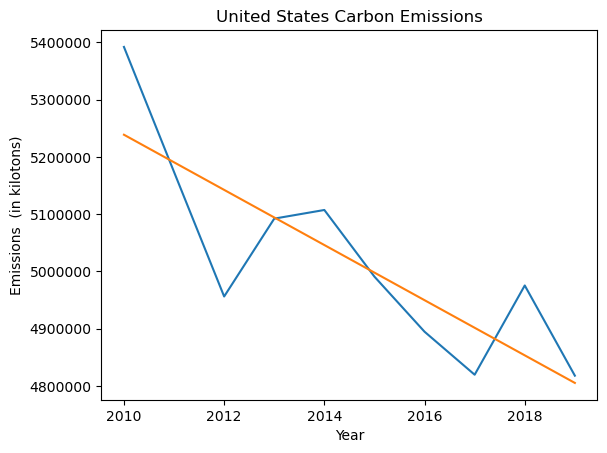

In [18]:
# Experimenting with a focus on the 1990s trends in USA
fig, ax = plt.subplots()
ax.plot(usa['Year'].loc[13259:13268], usa['Carbon Emissions (in kilotons)'].loc[13259:13268])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("United States Carbon Emissions")
ax.ticklabel_format(style='plain')
# calculate and plot the trendline using the three lines of code below.
z = np.polyfit(usa['Year'].loc[13259:13268], usa['Carbon Emissions (in kilotons)'].loc[13259:13268], 1)
p = np.poly1d(z)
ax.plot(usa['Year'].loc[13259:13268], p(usa['Year'].loc[13259:13268]))
plt.show()

- ##### How does the US compare with a country like Russia?

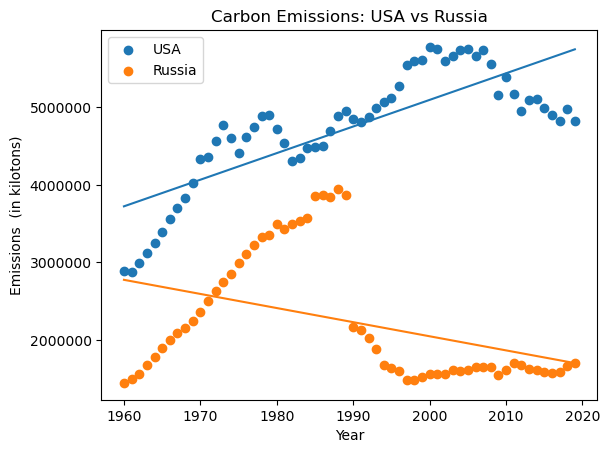

In [51]:
# Comparing USA and Russia emissions with accompanying trendlines.
fig, ax = plt.subplots()
ax.scatter(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.scatter(rus['Year'], rus['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("Carbon Emissions: USA vs Russia")
ax.ticklabel_format(style='plain')
# Calculations for each country's individual trendlines.
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
zz = np.polyfit(rus['Year'], rus['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
pp = np.poly1d(zz)
# Code to plot the trendlines
ax.plot(usa['Year'], p(usa['Year']))
ax.plot(rus['Year'], pp(rus['Year']))
ax.legend(['USA', 'Russia'])
plt.show()

- ##### Drastic difference, right? Though, you have to take into consideration population differences between the two countries as well as industrial outputs. How do other countries in the top 5 compare?

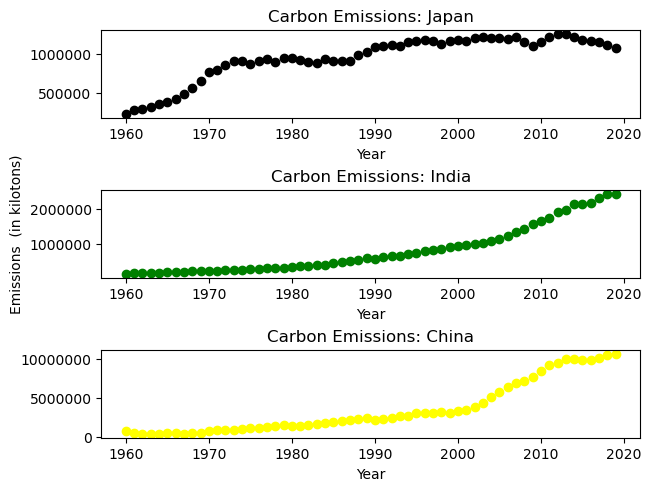

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, layout = "constrained")

ax1.scatter(jpn['Year'], jpn['Carbon Emissions (in kilotons)'], color="black", )
ax2.scatter(ind['Year'], ind['Carbon Emissions (in kilotons)'], color="green")
ax3.scatter(chn['Year'], chn['Carbon Emissions (in kilotons)'], color="yellow")

ax1.set_xlabel('Year')
ax1.set_title("Carbon Emissions: Japan")
ax1.ticklabel_format(style='plain')

ax2.set_xlabel('Year')
ax2.set_ylabel('Emissions  (in kilotons)')
ax2.set_title("Carbon Emissions: India")
ax2.ticklabel_format(style='plain')

ax3.set_xlabel('Year')
ax3.set_title("Carbon Emissions: China")
ax3.ticklabel_format(style='plain')


- ##### Well, that's not the easiest to read chart, now is it? You can get a general sense of progression amongst these countries, but you really have to pay attention to the y axis to really appreciate the scale at which China is operating. ALternatively, I could just plot these remaining countries into a combined chart like I did with the United States and Russia for a more direct comparison.

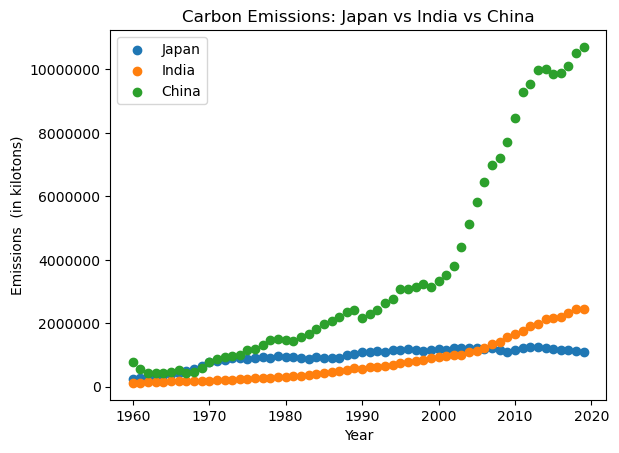

In [54]:
fig, ax = plt.subplots()
ax.scatter(jpn['Year'], jpn['Carbon Emissions (in kilotons)'])
ax.scatter(ind['Year'], ind['Carbon Emissions (in kilotons)'])
ax.scatter(chn['Year'], chn['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("Carbon Emissions: Japan vs India vs China")
ax.legend(['Japan','India', 'China'])
ax.ticklabel_format(style='plain')

- ##### Plotting these countries in the original way that I did for the USA and Russia really allows us to see the vast output that China has compared to the other countries.